In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Exploratory Data Analysis
Checking the popularity column

## Initial remarks

The distribution of the data in popularity column looks bimodal with distinct peaks. Not sure yet what this means and whether binning is required. Potential bins: 0-20, 20-40, 40-60 etc. 

954 tracks score >= 80 in 'popularity'

Majority of popular tracks released between 2015-2020

In [2]:
# load the file
file_path = ("../spotify_data/tracks.csv")
df = pd.read_csv(file_path)
df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [4]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


<AxesSubplot:ylabel='Density'>

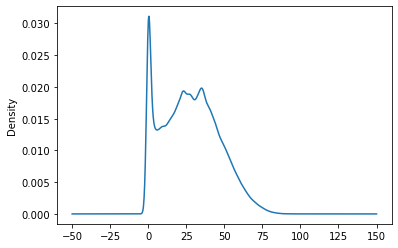

In [5]:
# Plot the density of popularity
df['popularity'].plot.density()

In [6]:
# Check popularity counts
popularity_count = df.popularity.value_counts()
popularity_count

0      44690
35     12231
23     12139
1      12024
36     11879
       ...  
96         2
98         1
99         1
95         1
100        1
Name: popularity, Length: 101, dtype: int64

In [7]:
popular_tracks = df[df.popularity >= 80].count()["id"]
popular_tracks

954

<AxesSubplot:ylabel='Density'>

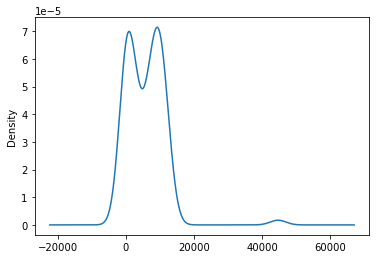

In [8]:
# Plot popularity_count
popularity_count.plot.density()

<AxesSubplot:>

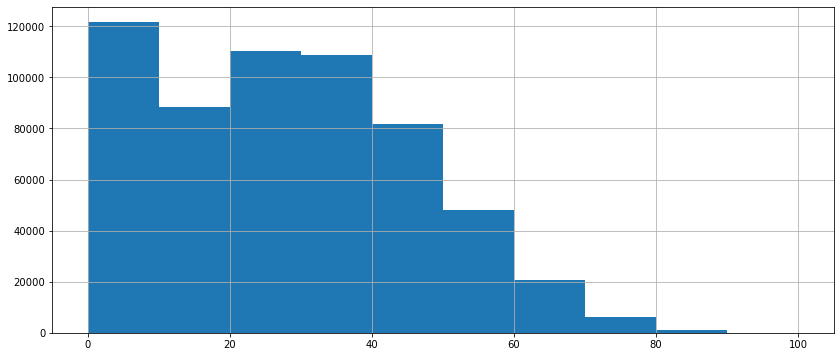

In [9]:
# visualize 'popularity' in a histogram
df.popularity.hist(figsize=[14,6])

In [10]:
# Create DataFrame and plot popular tracks by year
popular_tracks_df = pd.DataFrame(df[df.popularity >=80])

# Convert release_date to datetime
popular_tracks_df.release_date = pd.to_datetime(popular_tracks_df.release_date)

<AxesSubplot:xlabel='release_date'>

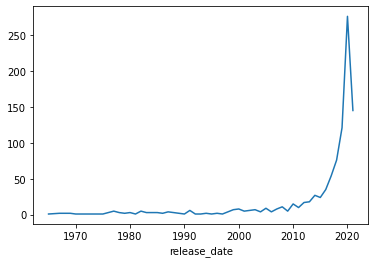

In [11]:
# Plot the popular tracks; code reference: https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column
(popular_tracks_df.groupby(popular_tracks_df['release_date'].map(lambda x: x.year)).count()['id']).plot()

## Plot numeric columns

In [50]:
# Get list of numeric columns; code reference: https://www.kaggle.com/dudewhat/spotify-eda
numeric_columns = df.select_dtypes(['int64', 'float64']).columns.tolist()
numeric_columns.remove('popularity')
numeric_columns

['duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [49]:
fig, ax = plt.subplots()
ax.plot(df['danceability'], df['popularity'])

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

# ETL

In [12]:
# Make a copy of the DataFrame for cleaning
df_to_clean = df.copy()

In [13]:
# Convert release_date to datetime
df_to_clean.release_date = pd.to_datetime(df_to_clean.release_date)
df_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [14]:
# save null values to new DF for inspection
null_row_df = df_to_clean[df_to_clean.isnull().any(axis=1)]
null_row_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [15]:
# Inspect the [''] values in artists to verify match with null values
df_to_clean[df_to_clean['artists'] == "['']"]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


<AxesSubplot:xlabel='release_date'>

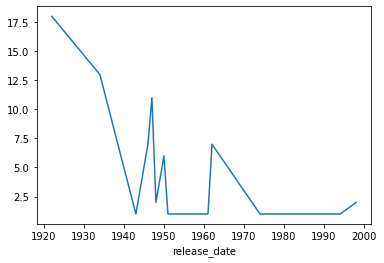

In [16]:
# Plot the release_date of null values; code reference: https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column
(null_row_df.groupby(null_row_df['release_date'].map(lambda x: x.year)).count()['id']).plot()

<AxesSubplot:>

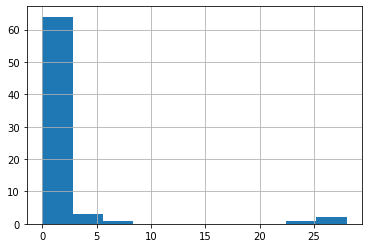

In [17]:
null_row_df.popularity.hist()

In [18]:
# Replace NaN in 'name' column with 'unknown'
df_to_clean2 = df_to_clean.replace(to_replace=np.nan, value='unknown', regex=True)
df_to_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586672 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [58]:
# As per notice in Kaggle, look for track names with 'Pause Track' and 0 numerical values
cleaned_df = df_to_clean2.drop(df_to_clean2[df_to_clean2['name'] == 'Pause Track'].index)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586659 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586659 non-null  object        
 1   name              586659 non-null  object        
 2   popularity        586659 non-null  int64         
 3   duration_ms       586659 non-null  int64         
 4   explicit          586659 non-null  int64         
 5   artists           586659 non-null  object        
 6   id_artists        586659 non-null  object        
 7   release_date      586659 non-null  datetime64[ns]
 8   danceability      586659 non-null  float64       
 9   energy            586659 non-null  float64       
 10  key               586659 non-null  int64         
 11  loudness          586659 non-null  float64       
 12  mode              586659 non-null  int64         
 13  speechiness       586659 non-null  float64       
 14  acou

In [68]:
# As per notice on Kaggle, look for duplicates in 'names' column
cleaned_df.name.duplicated().value_counts()

False    446474
True     140185
Name: name, dtype: int64

In [67]:
duplicates_df = pd.DataFrame(cleaned_df[cleaned_df['name'].duplicated()])
duplicates_df.name.value_counts()

Summertime              100
Intro                    91
Year 3000                90
Hold On                  86
2000 Years               75
                       ... 
矜持                        1
Timorise Me               1
憑著愛                       1
Jazztyttö                 1
Help Me Lose My Mind      1
Name: name, Length: 70381, dtype: int64

In [69]:
duplicates_df[duplicates_df['name'] == 'Summertime']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8191,4DBZvNW9wB1vHzzRcFbDZF,Summertime,16,173493,0,['Billie Holiday'],['1YzCsTRb22dQkh9lghPIrp'],1933-01-01,0.628,0.2260,10,-14.075,0,0.0371,0.903,0.000006,0.1710,0.6080,99.392,4
9063,2sm4UHxiCzGSN3z77wBbCX,Summertime,0,311040,0,"['Licia Fox', 'Tormy Van Cool']","['4zdsw3NAikek7QUCQewWkY', '5PwJMO1gFDHvYlOrXP...",1934-01-01,0.444,0.0982,3,-12.822,0,0.0325,0.929,0.000286,0.1340,0.0749,112.735,3
9073,34Jq65BjzvCDMDD28gjHI4,Summertime,2,100880,0,"['George Gershwin', 'Jascha Heifetz', 'Brooks ...","['1YuknfkSYTTbolRpwZBOv4', '7yaBUcdjmqPP2vIv6F...",1934-01-01,0.263,0.1180,0,-23.171,1,0.0378,0.855,0.137000,0.2540,0.2030,91.692,4
9305,6FAoy4Agq5A3lgyGQGmGK4,Summertime,0,291553,0,['Chris G LeBon'],['7GNG4tw2LU9Ziy8NT4EQWk'],1934-01-01,0.504,0.5550,9,-11.807,0,0.0470,0.388,0.011000,0.3200,0.6330,135.880,4
9753,0mo1ZNxoOv6qJoz8kOg7GM,Summertime,0,297093,0,['Jeff Stetson'],['3oEJgsyIWHZawiaSNxpvOY'],1935-01-01,0.266,0.3980,0,-12.983,0,0.0295,0.723,0.439000,0.0824,0.0579,182.652,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543589,77L6MCJfCJ3iD37bPQqVVi,Summertime,8,104013,0,"['Lambert, Hendricks & Ross']",['5XILwCCPqHHh1JRnMfzblg'],1959-01-01,0.374,0.5000,5,-7.373,0,0.0284,0.638,0.000000,0.1060,0.7010,130.877,4
544526,2diT8KZPZY0eJAmTbssFWr,Summertime,11,245773,0,['Diana Ross'],['3MdG05syQeRYPPcClLaUGl'],1987-05-01,0.316,0.1550,4,-18.818,0,0.0323,0.494,0.000463,0.0837,0.1260,77.384,4
563478,4SwQ8m0PMgkmQND1pkV3CN,Summertime,13,359133,0,['Bill Evans Trio'],['3VEG6gxFIMfl4Cdog26avS'],1964-01-01,0.616,0.1590,4,-22.777,0,0.0480,0.544,0.328000,0.0694,0.4400,78.342,4
563713,3mg5oLUFI6sGh99Qrhr8do,Summertime,12,132299,0,['Herb Alpert & The Tijuana Brass'],['09L3cUdx0hq6qn5bKuJJ4I'],1971-07-01,0.752,0.2350,1,-20.726,1,0.0928,0.780,0.231000,0.1510,0.3560,145.994,4


In [71]:
duplicates_df[duplicates_df['name'] == '2000 Years']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
320074,5povOhtjbplZ7UNgzbPNsV,2000 Years,9,193823,0,['Like Lovers'],['0puXK77dHMF8fzrgmov6MF'],2020-12-18,0.569,0.896,6,-8.037,0,0.0390,0.084300,0.000934,0.1390,0.709,140.037,4
320096,4RuEOnqhebTYeGxBSenTHu,2000 Years,9,242640,0,['Burning Spear'],['6qaKS0nzGP4hfjl4aFZmEU'],2001-08-20,0.829,0.451,1,-10.008,1,0.0646,0.417000,0.821000,0.0587,0.802,74.763,4
320150,3i93jYGPWgBR0s6wEf9Ogu,2000 Years,5,275208,0,['Fat Soul'],['5SeqRTvitcVi7i7F5uNdYG'],2021-01-22,0.366,0.538,7,-7.294,0,0.0299,0.006680,0.005140,0.1690,0.238,133.815,4
320151,1r5oL2t4OQTKCDUnqbdmLg,2000 Years,7,263283,0,['Donn Bhat'],['2ckYmy0ueLXjmwWcPs1spQ'],2016-10-05,0.710,0.634,9,-8.414,1,0.0302,0.059000,0.254000,0.0663,0.799,138.061,4
320152,5JXhzXfDgUCUGz9RxTz8y0,2000 Years,5,364453,0,['Inter Arma'],['5ZG7r3Jg0Y1hGQRMQ8hdRs'],2010-01-01,0.354,0.980,2,-6.128,1,0.1400,0.000021,0.867000,0.3320,0.106,135.765,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425059,0rkwrVjmWOFJWSzToXOPsP,2000 Years,0,180040,0,['Decanto'],['3dshzkIimkdP6kM9jqNiXS'],2008-11-18,0.397,0.648,0,-4.449,1,0.0260,0.409000,0.000000,0.1370,0.355,144.568,4
425061,6An8c3PaSwYofGKIF03RzL,2000 Years,0,347547,0,['Emily Slade'],['653SaKIFoW6u29lbvyXrZ4'],2001-07-02,0.300,0.331,2,-10.220,1,0.0431,0.822000,0.000000,0.1030,0.363,50.517,4
425062,1LROYaqADVMnboShSycWFU,2000 Years,0,245317,0,['David Ricci'],['6CMxY6IlEFCCtvXJ6icXjv'],2019-05-13,0.302,0.475,4,-8.073,1,0.0295,0.368000,0.002280,0.1000,0.246,80.151,4
448031,68TLaP7LQFU8lCdxPZ6PWk,2000 Years,0,208800,0,['Darden Smith'],['6CUKhaUkMI9j5qAEyuRfaA'],1993-01-01,0.703,0.530,5,-11.786,1,0.0289,0.003680,0.000000,0.2680,0.693,121.755,4


### Duplications mentioned on Kaggle possibly only similar in track name.

In [72]:
cleaned_df.duplicated().any()

False

In [73]:
cleaned_df.to_csv("Resources/cleaned_tracks.csv")